In [1]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
X = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1], [0, 1, 0], [0, 1, 1]])
mds = MDS(random_state=0)
X_transform = mds.fit_transform(X)
print(X_transform)

[[ 0.72521687  0.52943352]
 [ 0.61640884 -0.48411805]
 [-0.9113603  -0.47905115]
 [-0.2190564   0.71505714]
 [-0.21120901 -0.28132146]]


In [3]:
stress = mds.stress_
print(stress)

0.18216844548575467


In [4]:
print(X)

[[0 0 0]
 [0 0 1]
 [1 1 1]
 [0 1 0]
 [0 1 1]]


In [6]:
dist_manhattan = manhattan_distances(X)
dist_manhattan

array([[0., 1., 3., 1., 2.],
       [1., 0., 2., 2., 1.],
       [3., 2., 0., 2., 1.],
       [1., 2., 2., 0., 1.],
       [2., 1., 1., 1., 0.]])

In [7]:
mds = MDS(dissimilarity='precomputed', random_state=0)

In [8]:
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

In [9]:
X_transform_L1

array([[ 0.9847767 ,  0.84738596],
       [ 0.81047787, -0.37601578],
       [-1.104849  , -1.06040621],
       [-0.29311254,  0.87364759],
       [-0.39729303, -0.28461157]])

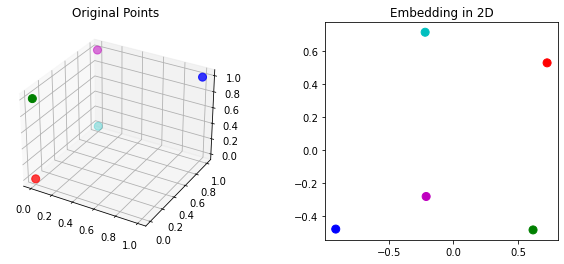

In [10]:
colors = ['r', 'g', 'b', 'c', 'm']
size = [64, 64, 64, 64, 64]
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

MDS preserves the patterns in data so that different face images of the same person are close to each other in the 2D space and far away from another person's mapped face.

In [11]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette=['r', 'g', 'b', 'c'])

    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)    
    plt.show()

In [12]:
faces = dt.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\m\scikit_learn_data


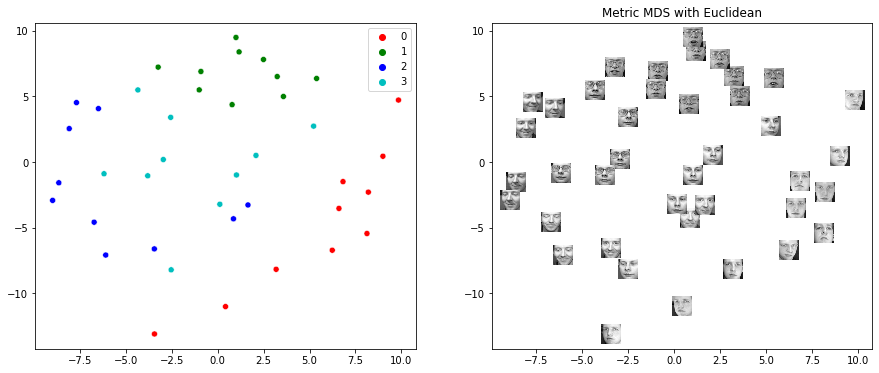

In [13]:
dist_euclid = euclidean_distances(X_faces)
mapData(dist_euclid, X_faces, y_faces, True, 
        'Metric MDS with Euclidean')

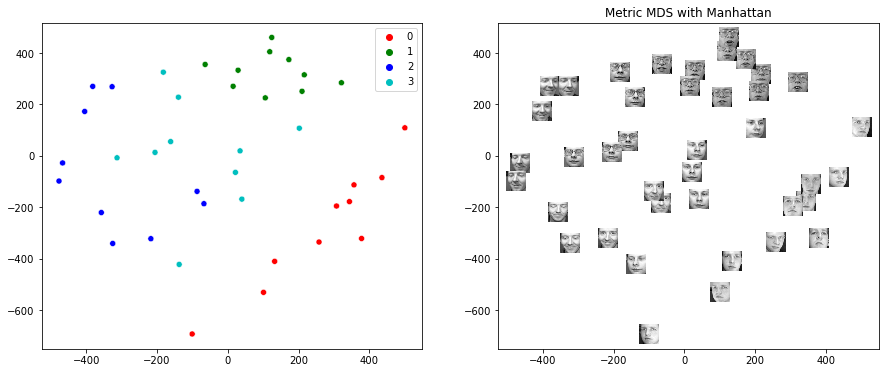

In [14]:
dist_L1 = manhattan_distances(X_faces)
mapData(dist_L1, X_faces, y_faces, True, 
        'Metric MDS with Manhattan')

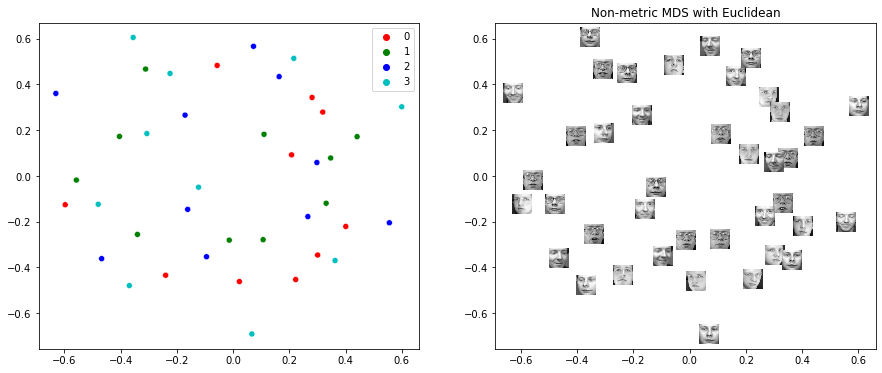

In [15]:
mapData(dist_euclid, X_faces, y_faces, False, 
        'Non-metric MDS with Euclidean')

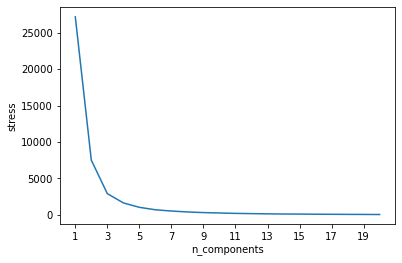

In [16]:
stress = []
# Max value for n_components
max_range = 21
for dim in range(1, max_range):
    # Set up the MDS object
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    # Apply MDS
    pts = mds.fit_transform(dist_euclid)
    # Retrieve the stress value
    stress.append(mds.stress_)
# Plot stress vs. n_components    
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

We can see that increasing the value of n_components decreases the stress value at the beginning and then the curve levels off. There's almost no difference between 18 and 19 dimensions, but there's a huge difference between 1 and 2 dimensions.

The elbow of the curve is a good choice for the optimal value of n_components. In this case the value can be taken at 4, which is an amazing 0.09% reduction of features/attributes.

Conclusions
This guide was an introduction to Multidimensional Scaling in Python, using Scikit-Learn. We've taken a look at how Multidimensional Scaling works, its hyperparameters, which vartiations exist and then applied it on a practical dataset.

We've used the Olivetti Faces dataset, from AT&T and illustrated that images residing in a 64x64 dimensional space can be mapped to a two-dimensional space, and still retain the individual patterns or clusters across images.